In [334]:
import pandas as pd
import FinanceDataReader as fdr


In [335]:
df_kos = fdr.StockListing('KOSPI')

In [336]:
df_kos[['Marcap','Stocks']].describe()

,Marcap,Stocks
count,9.430000e+02,9.430000e+02
mean,2.045071e+12,6.717417e+07
std,1.358830e+13,2.237794e+08
min,3.013632e+09,1.098520e+05
25%,9.004520e+10,1.041226e+07
50%,2.290252e+11,2.719508e+07
75%,7.248882e+11,6.130395e+07
max,3.701265e+14,5.969783e+09


In [337]:
df_kos[df_kos['Marcap']== 3013632000]

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
942,000547,KR7000542001,흥국화재2우B,KOSPI,,19620,1,550,2.88,19070,23000,19070,13309,278478290,3013632000,153600,STK


In [338]:
kos_list=df_kos[(df_kos['Marcap'] ==0) | (df_kos['Marcap'] <= 8.978561e+10) |(df_kos['Stocks'] <= 1.041226e+07)] .index
df_kos.drop(kos_list,axis='index',inplace=True)


In [339]:
df_kos_code=df_kos['Code'].to_frame()


In [340]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

KR = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
KR['Code'] = KR['종목코드'].apply(make_code)
KR_list_1 = KR[KR['상장일'] < '2000-01-01']['Code'].to_frame()
KR_list_2 = KR[(KR['상장일'] >= '2000-01-01') & (KR['상장일'] < '2007-01-01')]['Code'].to_frame()
KR_list_3 = KR[(KR['상장일'] >= '2007-01-01') & (KR['상장일'] < '2015-06-15')]['Code'].to_frame()
KR_list_4 = KR[KR['상장일'] >= '2015-06-15']['Code'].to_frame()


In [341]:
df_kr_1 = pd.concat([df_kos_code,KR_list_1])
df_kr_2 = pd.concat([df_kos_code,KR_list_2])
df_kr_3 = pd.concat([df_kos_code,KR_list_3])
df_kr_4 = pd.concat([df_kos_code,KR_list_4])


In [342]:
df_kr1=df_kr_1[df_kr_1.duplicated()]
df_kr2=df_kr_2[df_kr_2.duplicated()]
df_kr3=df_kr_3[df_kr_3.duplicated()]
df_kr4=df_kr_4[df_kr_4.duplicated()]

In [343]:
kr1=[]
kr2=[]
kr3=[]
kr4=[]

In [344]:
from tqdm import tqdm
import time


for i in range(len(df_kr1)):
    df=pd.DataFrame
    kr1.append(df)

for i in range(len(df_kr2)):
    df=pd.DataFrame
    kr2.append(df) 

for i in range(len(df_kr3)):
    df=pd.DataFrame
    kr3.append(df)  

for i in range(len(df_kr4)):
    df=pd.DataFrame
    kr4.append(df)     


In [345]:
for i in range(len(df_kr1)):
    kr1[i] = fdr.DataReader(df_kr1.iat[i,0],'1980')
    kr1[i]['Code'] =df_kr1.iat[i,0]



In [346]:
for i in range(len(df_kr2)):
    kr2[i] = fdr.DataReader(df_kr2.iat[i,0],'2000')
    kr2[i]['Code'] =df_kr2.iat[i,0]

In [347]:
for i in range(len(df_kr3)):
    kr3[i] = fdr.DataReader(df_kr3.iat[i,0],'2007')
    kr3[i]['Code'] =df_kr3.iat[i,0]
    

In [348]:
for i in range(len(df_kr4)):
    kr4[i] = fdr.DataReader(df_kr4.iat[i,0],'2015-6-15')
    kr4[i]['Code'] =df_kr4.iat[i,0]

In [349]:
df_Kr1 = pd.DataFrame(kr1) ## 2000년 이전 상장기업 1980년도부터 주가데이터
df_Kr2 = pd.DataFrame(kr2) ## 2000년~2007년 상장기업 2000년부터 주가데이터
df_Kr3 = pd.DataFrame(kr3) ## 2007년~2015년 상장기업 2007년부터 주가데이터
df_Kr4 = pd.DataFrame(kr4) ## 2015년~ 상장기업 2015년부터 주가데이터


c:\Users\jhm21\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

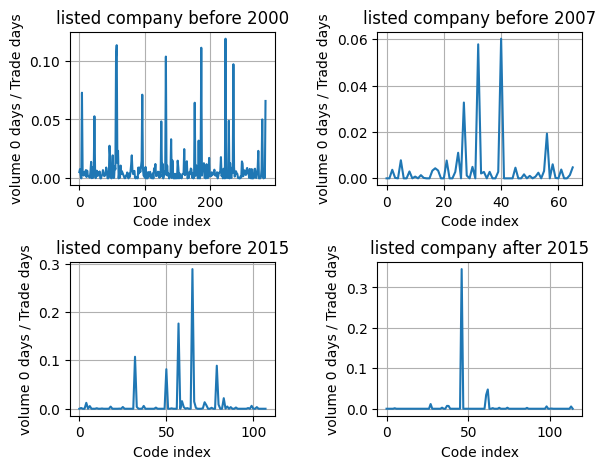

In [351]:
kr_ft_V_1 =[]
kr_ft_V_2 =[]
kr_ft_V_3 =[]
kr_ft_V_4 = []
kr_ft_V =[]
for i in range(len(df_kr1)):
    kr_ft_V_1.append((len(kr1[i][kr1[i]['Volume']==0])/len(kr1[i])))

kr_ft_V_1=pd.DataFrame(kr_ft_V_1)

for i in range(len(df_kr2)):
    kr_ft_V_2.append((len(kr2[i][kr2[i]['Volume']==0])/len(kr2[i])))
    
kr_ft_V_2 = pd.DataFrame(kr_ft_V_2)    
for i in range(len(df_kr3)):
    kr_ft_V_3.append((len(kr3[i][kr3[i]['Volume']==0])/len(kr3[i])))
kr_ft_V_3 = pd.DataFrame(kr_ft_V_3)    

for i in range(len(df_kr4)):
    kr_ft_V_4.append((len(kr4[i][kr4[i]['Volume']==0])/len(kr4[i])))
kr_ft_V_4 = pd.DataFrame(kr_ft_V_4)  

kr_ft_V = pd.concat([kr_ft_V_1,kr_ft_V_2,kr_ft_V_3,kr_ft_V_4])
kr_ft_V_d = pd.concat([kr_ft_V_1,kr_ft_V_2,kr_ft_V_3,kr_ft_V_4],axis=1)
kr_ft_V=kr_ft_V.reset_index().iloc[:,[1]]
plt.subplot(2, 2, 1)
plt.plot(kr_ft_V_1)
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 2)  
plt.plot(kr_ft_V_2)
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 3)  
plt.plot(kr_ft_V_3)
plt.title('listed company before 2015')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 4)  
plt.plot(kr_ft_V_4)
plt.title('listed company after 2015')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

In [392]:
kr_ft_V_d.describe()

,0,0,0,0
count,285.000000,66.000000,108.000000,115.000000
mean,0.008411,0.004028,0.008311,0.004151
std,0.018030,0.010962,0.035465,0.032598
min,0.000000,0.000000,0.000000,0.000000
25%,0.000503,0.000000,0.000000,0.000000
50%,0.003667,0.000177,0.000000,0.000000
75%,0.007500,0.003114,0.001485,0.000000
max,0.118500,0.060176,0.288573,0.345464


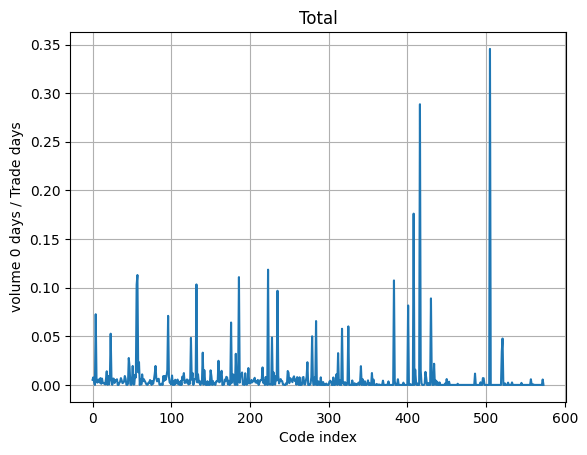

In [353]:
plt.plot(kr_ft_V)
plt.title('Total')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()
plt.show()


In [355]:
## 상장 기업별 특이값제거 
index1 = kr_ft_V_1[kr_ft_V_1[0]>= 0.04].index
index2 = kr_ft_V_2[kr_ft_V_2[0] >= 0.018].index
index3 = kr_ft_V_3[kr_ft_V_3[0]>= 0.05].index
index4 = kr_ft_V_4[kr_ft_V_4[0]>= 0.03].index


Int64Index([4, 23, 56, 57, 96, 125, 132, 176, 186, 223, 228, 235, 279, 284], dtype='int64')

In [357]:
df_Kr1.drop(index1 ,axis='index', inplace=True)
df_Kr2.drop(index2 ,axis='index', inplace=True)
df_Kr3.drop(index3 ,axis='index', inplace=True)
df_Kr4.drop(index4 ,axis='index', inplace=True) 

In [408]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)
df_Kr3.reset_index(drop=True,inplace=True)
df_Kr4.reset_index(drop=True,inplace=True)

In [412]:
df_Kr1[0

0                  Open  High   Low  Close  Volume   ...
1                   Open   High    Low  Close  Volume...
2                   Open   High    Low  Close  Volume...
3                    Open    High     Low   Close   V...
4                   Open   High    Low  Close  Volume...
                             ...                        
266                Open  High   Low  Close  Volume   ...
267                Open  High   Low  Close   Volume  ...
268                 Open   High    Low  Close  Volume...
269                  Open    High     Low   Close  Vo...
270                Open  High   Low  Close   Volume  ...
Name: 0, Length: 271, dtype: object

In [389]:
kr1[2].loc[:'2015-6-15']

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
1998-11-12,6378,6730,6167,6495,194230,NaN,010060
1998-11-13,6566,6683,6120,6331,114500,-0.025250,010060
1998-11-14,6800,6800,6378,6659,144170,0.051809,010060
1998-11-16,6589,6777,6472,6706,139280,0.007058,010060
1998-11-17,6707,6707,6331,6472,142450,-0.034894,010060
...,...,...,...,...,...,...,...
2015-06-09,91300,95300,91300,93000,219297,0.020856,010060
2015-06-10,94300,94700,92200,92200,121042,-0.008602,010060
2015-06-11,93500,93500,90300,90600,197431,-0.017354,010060


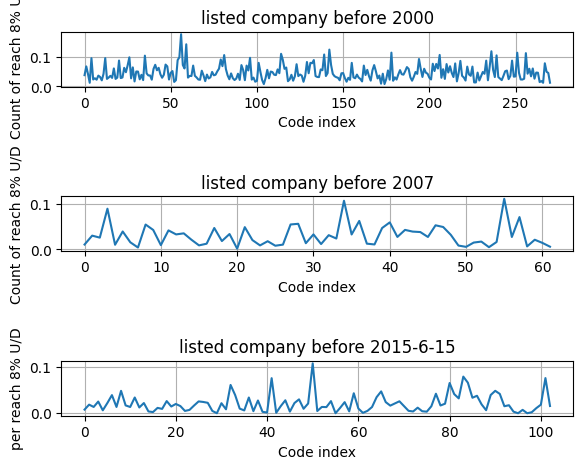

In [394]:
kr_ft_15_TB_1 =[]
kr_ft_15_TB_2 =[]
kr_ft_15_TB_3 =[]
kr_ft_15_TB =[]

for i in range(len(df_Kr1)):
    kr_ft_15_TB_1.append(len(kr1[i].loc[:'2015-6-15'][(kr1[i].loc[:'2015-6-15']['Change']>0.08) | (kr1[i].loc[:'2015-6-15']['Change']< -0.08)])/len(kr1[i].loc[:'2015-6-15']))

for i in range(len(df_Kr2)):
    kr_ft_15_TB_2.append(len(kr2[i].loc[:'2015-6-15'][(kr2[i].loc[:'2015-6-15']['Change']>0.08) | (kr2[i].loc[:'2015-6-15']['Change']< -0.08)])/len(kr2[i].loc[:'2015-6-15']))

for i in range(len(df_Kr3)):
    kr_ft_15_TB_3.append(len(kr3[i].loc[:'2015-6-15'][(kr3[i].loc[:'2015-6-15']['Change']>0.08) | (kr3[i].loc[:'2015-6-15']['Change']< -0.08)])/len(kr3[i].loc[:'2015-6-15']))

kr_ft_15_TB = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)])
kr_ft_15_TB_d = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)],axis=1)
plt.subplot(3, 1, 1)  
plt.plot(pd.DataFrame(kr_ft_15_TB_1))
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('Count of reach 8% U/D')
plt.grid()

plt.subplot(3, 1, 2)  
plt.plot(pd.DataFrame(kr_ft_15_TB_2))
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('Count of reach 8% U/D')
plt.grid()

plt.subplot(3, 1, 3)  
plt.plot(pd.DataFrame(kr_ft_15_TB_3))
plt.title('listed company before 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('per reach 8% U/D')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=2)
plt.show()
    


In [397]:
kr_ft_15_TB_1=pd.DataFrame(kr_ft_15_TB_1)
kr_ft_15_TB_2=pd.DataFrame(kr_ft_15_TB_2)
kr_ft_15_TB_3=pd.DataFrame(kr_ft_15_TB_3)

In [401]:
kr_ft_15_TB_1


,0
0,0.038246
1,0.067966
2,0.041900
3,0.012424
4,0.095737
...,...
266,0.012424
267,0.078441
268,0.049695
269,0.045798


In [378]:
kr_ft_15_TB_1

,0
0,0.038246
1,0.067966
2,0.041900
3,0.012424
4,0.023630
...,...
266,0.038490
267,0.028745
268,0.024361
269,0.061632


In [373]:
kr_ft_15_TB_d.describe()

,0,0,0
count,271.000000,62.000000,103.000000
mean,0.045578,0.030488,0.019470
std,0.025560,0.023967,0.017046
min,0.003868,0.001744,0.000000
25%,0.027406,0.012014,0.006389
50%,0.038490,0.024842,0.015385
75%,0.058587,0.042330,0.025886
max,0.142753,0.110643,0.078810


<Axes: >

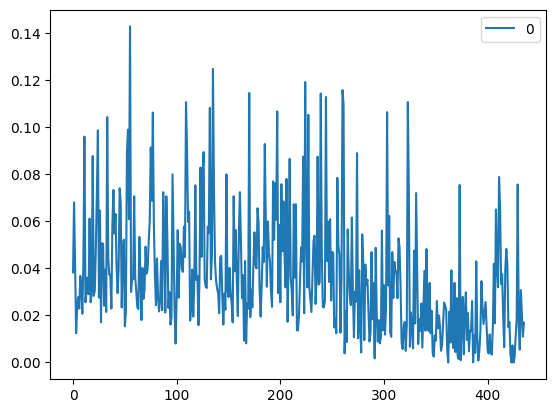

In [375]:
kr_ft_15_TB=kr_ft_15_TB.reset_index().iloc[:,[1]]
kr_ft_15_TB.plot()

In [ ]:
index5 = kr_ft_V_1[kr_ft_V_1[0]>= 0.04].index
index6= kr_ft_V_2[kr_ft_V_2[0] >= 0.018].index
index7 = kr_ft_V_3[kr_ft_V_3[0]>= 0.05].index


In [ ]:
df_Kr1.drop(index1 ,axis='index', inplace=True)
df_Kr2.drop(index2 ,axis='index', inplace=True)
df_Kr3.drop(index3 ,axis='index', inplace=True)
df_Kr4.drop(index4 ,axis='index', inplace=True) 

In [85]:
kr_ft_15_TB_1 =[]
kr_ft_15_TB_2 =[]
kr_ft_15_TB_3 =[]
kr_ft_15_TB =[]

for i in range(len(df_Kr1)):
    kr_ft_15_TB_1.append(len(df_Kr1[0].iloc[i].loc[:'2015-6-15'][(df_Kr1[0].iloc[i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr1[0].iloc[i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr1[0].iloc[i].loc[:'2015-6-15']))

for i in range(len(df_Kr2)):
    kr_ft_15_TB_2.append(len(df_Kr2[0].iloc[i].loc[:'2015-6-15'][(df_Kr2[0].iloc[i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr2[0].iloc[i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr2[0].iloc[i].loc[:'2015-6-15']))

for i in range(len(df_Kr3)):
    kr_ft_15_TB_3.append(len(df_Kr3[0].iloc[i].loc[:'2015-6-15'][(df_Kr3[0].iloc[i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr3[0].iloc[i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr3[0].iloc[i].loc[:'2015-6-15']))

kr_ft_15_TB = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)])
kr_ft_15_TB_d = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)],axis=1)
plt.subplot(3, 1, 1)  

[            Open  High   Low  Close  Volume    Change    Code
 Date                                                         
 1998-11-12   598   609   582    604   18000       NaN  004840
 1998-11-13   611   611   582    590   27000 -0.023179  004840
 1998-11-14   586   586   583    590    4100  0.000000  004840
 1998-11-16   612   612   593    596    5900  0.010169  004840
 1998-11-17   592   609   592    598   21700  0.003356  004840
 ...          ...   ...   ...    ...     ...       ...     ...
 2023-02-17  4345  4420  4345   4420    4174  0.017261  004840
 2023-02-20  4420  4500  4305   4410    7467 -0.002262  004840
 2023-02-21  4490  4490  4355   4430    9106  0.004535  004840
 2023-02-22  4645  4850  4505   4520  255333  0.020316  004840
 2023-02-23  4520  4585  4520   4535   20886  0.003319  004840
 
 [6000 rows x 7 columns],
              Open   High    Low  Close  Volume    Change    Code
 Date                                                            
 1998-11-12  26265  2

In [110]:
kr1.drop(index = kr1_ft_V[kr1_ft_V[0]>= 0.04].index)

,0
0,Open High Low Close Volume ...
1,Open High Low Close Volume...
2,Open High Low Close Volume...
3,Open High Low Close V...
5,Open High Low Close Volume...
...,...
278,Open High Low Close Volume ...
280,Open High Low Close Volume ...
281,Open High Low Close Volume...
282,Open High Low Close Vo...


In [ ]:
## 상장 기업별 특이값제거 
df_Kr1.drop(index = kr_ft_V_1[kr_ft_V_1[0]>= 0.04].index, inplace=True)
df_Kr2.drop(index = kr_ft_V_2[kr_ft_V_2[0]>= 0.018].index, inplace=True)
df_Kr3.drop(index = kr_ft_V_3[kr_ft_V_3[0]>= 0.05].index, inplace=True)
df_Kr4.drop(index = kr_ft_V_4[kr_ft_V_4[0]>= 0.03].index, inplace=True) 

kos_list=df_kos[(df_kos['Marcap'] ==0) | (df_kos['Marcap'] <= 8.978561e+10) |(df_kos['Stocks'] <= 1.041226e+07)] .index
df_kos.drop(kos_list,axis='index',inplace=True)


In [ ]:
kr_ft_TD =[]
for i in range(len(df_kr1)):
    kr1_ft_V.append((len(kr1[i][kr1[i]['Volume']==0])/len(kr1[i])))
kr1_ft_V=pd.DataFrame(kr1_ft_V)
kr1_ft_V.plot()

47

In [38]:
for i in range(df_kr1):
    kr1[i]['Volume'].count(0)

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2023-02-17,24150,25050,23950,24600,104323,0.004082,001390
2023-02-20,24750,25700,24600,25400,207490,0.032520,001390
2023-02-21,25650,25700,24450,24700,186918,-0.027559,001390
2023-02-22,24350,24350,23400,23500,161668,-0.048583,001390
2023-02-23,23900,24200,23400,24000,71205,0.021277,001390


In [37]:
kr4[1].loc['2021-05-27':'2023-02-23',:]

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2021-05-27,12650,14300,12000,12000,11609074,NaN,383800
2021-05-28,12300,13000,12150,12250,4033208,0.020833,383800
2021-05-31,12100,12150,10950,10950,4843811,-0.106122,383800
2021-06-01,11000,11300,10900,11000,1879288,0.004566,383800
2021-06-02,10700,10850,10600,10700,2426922,-0.027273,383800
...,...,...,...,...,...,...,...
2023-02-17,8440,8470,8400,8420,86503,-0.003550,383800
2023-02-20,8420,8470,8400,8450,82136,0.003563,383800
2023-02-21,8440,8510,8440,8510,104101,0.007101,383800


In [ ]:
xs=[]
ys=[]
for i in range(9):
    X = dfxs[i].values.tolist()
    y = dfys[i].values.tolist()
    xs.append(X)
    ys.append(y)


In [ ]:
window_size = 10

Xx = []
Yy =[] 
 
for i in range(9):
    linex = [] 
    liney = []
    X=xs[i]
    Y=ys[i]
    b=len(ys[i])
    for j in range(b-window_size):
         
        _X = X[j : j + window_size] 
        _y = Y[j + window_size]   
        linex.append(_X)
        liney.append(_y)  
    
    Xx.append(linex)
    Yy.append(liney)
Yy

In [ ]:
train_X=[]
train_y=[]
test_X=[]
test_y=[]

for i in range(len(list_kr_0)):
    train_size = int(len(Yy[i]) * 0.7)
    train_X.append(np.array(Xx[i][0 : train_size]))
    train_y.append(np.array(Yy[i][0 : train_size]))
    test_size = len(Xx[i]) - train_size
    test_X.append(np.array(Xx[i][train_size : len(Xx[i])]))
    test_y.append(np.array(Yy[i][train_size : len(Yy[i])]))
train_y